<a href="https://colab.research.google.com/github/SURYAPRAKASHRH/Semantic_Segmentation/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
pip install mxnet

     |████████████████████████████████| 55.0MB 61kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [3]:
pip install gluoncv

     |████████████████████████████████| 819kB 8.1MB/s 


In [4]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

In [14]:
!wget https://img.theweek.in/content/dam/week/news/india/images/2020/7/7/BRO-border-road-ladakh-vijayak-himank-sanjay.jpg


--2020-11-27 14:55:17--  https://img.theweek.in/content/dam/week/news/india/images/2020/7/7/BRO-border-road-ladakh-vijayak-himank-sanjay.jpg
Resolving img.theweek.in (img.theweek.in)... 23.64.222.30, 2600:1409:12:3a1::4a9, 2600:1409:12:3a9::4a9
Connecting to img.theweek.in (img.theweek.in)|23.64.222.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56867 (56K) [image/jpeg]
Saving to: ‘BRO-border-road-ladakh-vijayak-himank-sanjay.jpg’

BRO-border-road-lad 100%[===================>]  55.53K  --.-KB/s    in 0.01s   

2020-11-27 14:55:17 (5.02 MB/s) - ‘BRO-border-road-ladakh-vijayak-himank-sanjay.jpg’ saved [56867/56867]



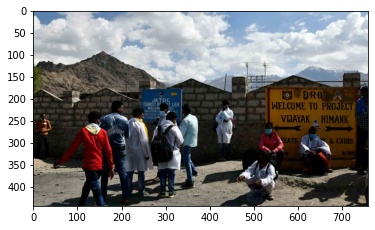

In [15]:
img = image.imread("/content/BRO-border-road-ladakh-vijayak-himank-sanjay.jpg")

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [16]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

In [17]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)

In [18]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(predict, 'ade20k')
mask.save('output.png')

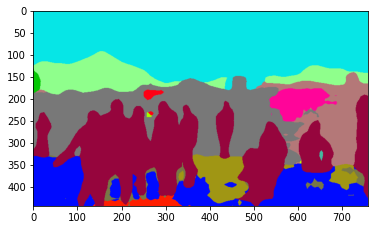

In [19]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()